#**EDA de la base de datos Air Quality Prediction**

El siguiente archivo contiene el "análisis exploratorio de datos" (EDA) de la base de datos usada para la competencia "EMC Data Science Global Hackathon (Air Quality Prediction)". El link para obtener información detallada de dicha competencia se expone a continuación:

https://www.kaggle.com/c/dsg-hackathon


Además, es necesario destacar que el desarrollo de este análsis es basado en un tutorial de Jason Brownlee, quien es Ph.D. en aprendizaje de maquina. El link del tutorial se expone a continuación:

https://machinelearningmastery.com/how-to-load-visualize-and-explore-a-complex-multivariate-multistep-time-series-forecasting-dataset/

##1.- Descripción del problema y de los datos
El conjunto de datos fue liberado el 2012, para una competencia nombrada "EMC Data Science Global Hackathon (Air Quality Prediction)" ("conjunto de datos AQP" de ahora en adelante para abreviar), estos fueron proporcionados por el gobierno local del Condado de Cook, Illinois, Estados Unidos. La base de datos corresponde a un conjunto de series temporales que contiene las condiciones climáticas de distintas ubicaciones del condado, con el objetivo de realizar predicciones de las mediciones de la calidad del aire durante los días siguientes.

El conjunto de datos AQP cuenta con 5 archivos, los cuales se listan a continuación

1. SiteLocations.csv
2. SiteLocations_with_more_sites.csv
3. SubmissionZerosExceptNAs.csv
4. TrainingData.csv
5. sample_code.r

El estudio se centrará en el archivo "TrainingData.csv", debido a que contiene los datos de entrenamiento. Estos datos contienen mediciones por hora de varias cantidades, muchas de ellas contaminantes, de tal forma que cada fila corresponde a las mediciones de una hora. Además, la base de datos fue dividida en porciones de tiempo ("fragmentos") de 11 días, sin embargo, solo los primeros 8 días de cada fragmento están disponibles en los datos de entrenamiento. El resto de los datos, osea los 3 días restantes de los fragmentos, fueron utilizados por los jueces de la competencia para probar los modelos de los participantes, sin embargo, este conjunto de datos de prueba no fue liberado posteriormente, por lo que para este trabajo solo se cuenta con la base de datos con fragmentos de 8 días de observaciones y variables objetivo. Finalmente, lo que se pedía en la competencia era realizar predicciones sobre varias ubicaciones dentro de los siguientes 3 días (1, 2, 3, 4, 5, 10, 17, 24, 48 y 72 horas después del final de los datos de entrenamiento).

El ganador de la hackaton logró un MAE de 0.21058, y el predictor lo obtuvo utilizando el método "Random Forest". A continuación se expone la publicación donde el ganador comenta su solución: 

https://medium.com/kaggle-blog/chucking-everything-into-a-random-forest-ben-hamner-on-winning-the-air-quality-prediction-788be7620e69


##2.- Análisis de la estructura general de los datos.

A continuación se vincula Google Drive con el servidor que ejecuta este código. De esta manera se realiza la lectura de los datos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
ls

gdrive/  sample_data/


In [3]:
ls gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/

Cook/          SiteLocations.csv                  SubmissionZerosExceptNAs.csv
sample_code.r  SiteLocations_with_more_sites.csv  TrainingData.csv


In [4]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP


In [5]:
ls

Cook/          SiteLocations.csv                  SubmissionZerosExceptNAs.csv
sample_code.r  SiteLocations_with_more_sites.csv  TrainingData.csv


###2.1- Lectura y verificación de datos faltantes

In [6]:
import pandas as pd
df = pd.read_csv('TrainingData.csv', header=0)
df.head()

rowID  chunkID  ...  target_9_4002  target_9_8003
0      1        1  ...       5.679280            NaN
1      2        1  ...       7.426751            NaN
2      3        1  ...       7.683732            NaN
3      4        1  ...       4.831243            NaN
4      5        1  ...       4.625658            NaN

[5 rows x 95 columns]

En la competencia adelantaban que existe una gran cantidad de valores "NAN" en la base de datos. Debido a aquello se procede a calcular el procentaje de los datos perdidos.

In [7]:
import numpy as np
# summarize
print(df.shape)
# trim and transform to floats
values = df.values
data = values[:, 6:].astype('float32')
# summarize amount of missing data
total_missing = np.count_nonzero(np.isnan(data))
percent_missing = total_missing / data.size * 100
print('Total Missing: %d/%d (%.1f%%)' % (total_missing, data.size, percent_missing))

(37821, 95)
Total Missing: 1922092/3366069 (57.1%)


Es posible visualizar que se cuenta con 37821 filas y 95 columnas, sin embargo estos son datos engañosos, ya que el conjunto de datos es irregular y tiene muchos datos faltantes. Tambien es posible ver que el porcentaje de datos perdidos es del 57% aproximadamente.

A continuación se explica lo que representa cada una de las columnas (o variables) del conjunto de datos.

*   **rowID**: Identificador irrepetible que permite diferenciar entre una observación y otra.
*   **chunkID**: Identificador repetible que permite diferenciar a qué "fragmento" se asocia el dato.
*   **position_within_chunk**: Identificador repetible que permite verificar el orden cronologico de los datos del fragmento.
*   **month_most_common**: Corresponde a un número del 1 al 12, el cual representa el mes más común del fragmento de datos.
*   **weekday**: Representa el día de la semana como una cadena de caracteres.
*   **hour**: Corresponde a un número del 0 al 23 que representa la hora de la medición.
*   **Solar.radiation_64**: Número decimal que representa la cantidad de radiación solar medida por el sensor con id 64.
*   **WindDirection..Resultant_1**: Corresponde a una variable númerica que representa la dirección desde la que sopla el viento. Esta dirección es dada como un ángulo, por ejemplo, un viento del este es "90". Cabe destacar que esta variable está asociada a un sensor con id 1.
*   **WindDirection..Resultant_1018**: Variable númerica que representa la dirección del viento para el sensor con id 1018.
*   **WindSpeed..Resultant_1**: Variable númerica que representa la velocidad el viento medida por el sensor con id 1.
*   **WindSpeed..Resultant_1018**: Variable númerica que representa la velocidad el viento medida por el sensor con id 1018.
*   **Ambient.Max.Temperature_(número de id)**: Varible númerica que representa la temperatura máxima medida por algún sensor en especifico.
*   **Ambient.Min.Temperature_(número de id)**: Varible númerica que representa la temperatura minima medida por algún sensor en especifico.
*   **Sample.Baro.Pressure_(número de id)**: Variable númerica que representa la presión atmosferica medida por algún sensor en especifico.
*   **Sample.Max.Baro.Pressure_(número de id)**: Variable númerica que representa la presión atmosferica máxima medida por algún sensor en especifico.
*   **Sample.Min.Baro.Pressure_(número de id)**: Variable númerica que representa la presión atmosferica minima medida por algún sensor en especifico.
*   **39 variables de predicción con el formato: target_(número variable)_(número id)**. De tal manera que "número variable" representa el tipo de varible medida, esto se debe a que se esconde el nombre real de la variable para el concurso, sin embargo el significado de cada varible fue revelado posteriormente y será expuesto a continuación. Por su parte, "número id" representa el número de id del sensor que fue utilizado para realizar la medición.

-------------------------------------------------------------------------------

**Description**:		Target Variable

**Carbon monoxide**:		8

**Sulfur dioxide**:		4

**SO2 max 5-min avg**3

**Nitric oxide (NO)**:		10

**Nitrogen dioxide (NO2)**:		14

**Oxides of nitrogen (NOx)**:		9

**Ozone**:		11

**PM10 Total 0-10um STP**:		5

**OC CSN Unadjusted PM2.5 LC TOT**:		15

**Total Nitrate PM2.5 LC**:		2

**EC CSN PM2.5 LC TOT**:		1

**Total Carbon PM2.5 LC TOT**:		7

**Sulfate PM2.5 LC**:		8

**PM2.5 Raw Data**:		4

**PM2.5 AQI & Speciation Mass**:		3

###2.2- Exploración de fragmentos de datos

La variable "chunkID" permite identifcar a qué fragmento pertenecen los datos. Un paso interesante es agrupar las observaciones con dicha variable. Para agruparlas se utiliza un diccionario en python.

Debido a que los fragmentos son de ocho días y las observaciones fueron realizadas por hora, se espera tener 192 (8*24) filas de datos por fragmento. Si se tienen 37821 filas en total y dividimos esto por 192, da que existen 196,9 fragmentos de datos, lo que signifca que algunos fragmentos contienen más o menos de 192 filas.

Se procede a separar la data, se cuenta la cantidad de filas de cada fragmento y se realiza un gráfico de caja junto a un histograma de dichos contadores.

[[1 1 1 ... nan 5.6792801662921795 nan]
 [2 1 2 ... nan 7.42675098668978 nan]
 [3 1 3 ... nan 7.68373198968942 nan]
 ...
 [190 1 190 ... nan 1.36199931589812 nan]
 [191 1 191 ... nan 1.61898031889777 nan]
 [192 1 192 ... nan 1.87596132189742 nan]]
Total Chunks: 208


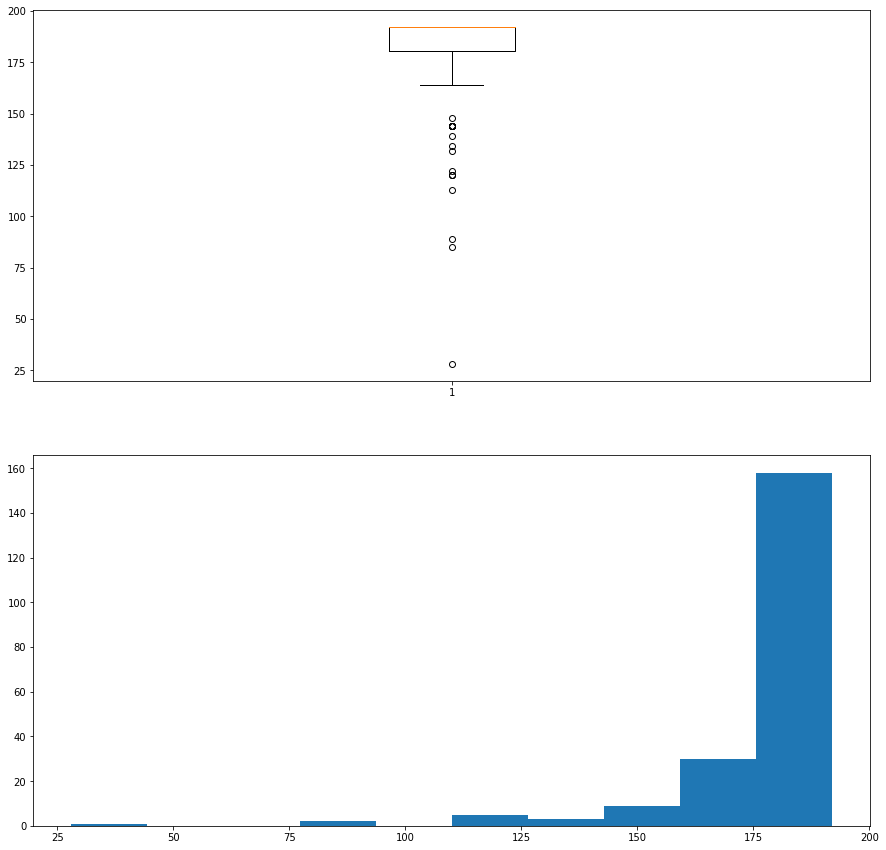

In [8]:
# split data into chunks
from numpy import unique
import matplotlib.pyplot as plt

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot distribution of chunk durations
def plot_chunk_durations(chunks):
  # chunk durations in hours
  chunk_durations = [len(v) for k,v in chunks.items()]
  fig,ax = plt.subplots(2, figsize = (15,15))
  # boxplot
  ax[0].boxplot(chunk_durations)
  # histogram
  ax[1].hist(chunk_durations)
  # histogram
  plt.show()


# group data by chunks
values = df.values
chunks = to_chunks(values)
print(chunks[1])
print('Total Chunks: %d' % len(chunks))
# plot chunk durations
plot_chunk_durations(chunks)

La cantidad de fragmentos es de 208. Por su parte, la mediana de la cantidad de filas por fragmento es 192, lo que indica que existe una gran cantidad de fragmentos que tiene los ocho días y las 24 horas de observaciones. Además, es posible ver que casi el 50% de los datos tiene menos de 192 filas, por lo que parece interesante analizar la continuidad con que fueron tomadas las mediciones de estos.

###2.3- Exploración de la continuidad de los fragmentos de datos

Para analizar la continuidad de las mediciones, se realizan gráficos de linea para todos los fragmentos que tienen menos de 192 filas, de tal manera que se dejan espacios en los momentos de tiempo que no existen mediciones.

Para hacer esto se utiliza un solo gráfico, donde el eje de las ordenadas corresponde a los identificadores de los fragmentos, y el eje de las abscisas representa la existencia de la medición en el tiempo.

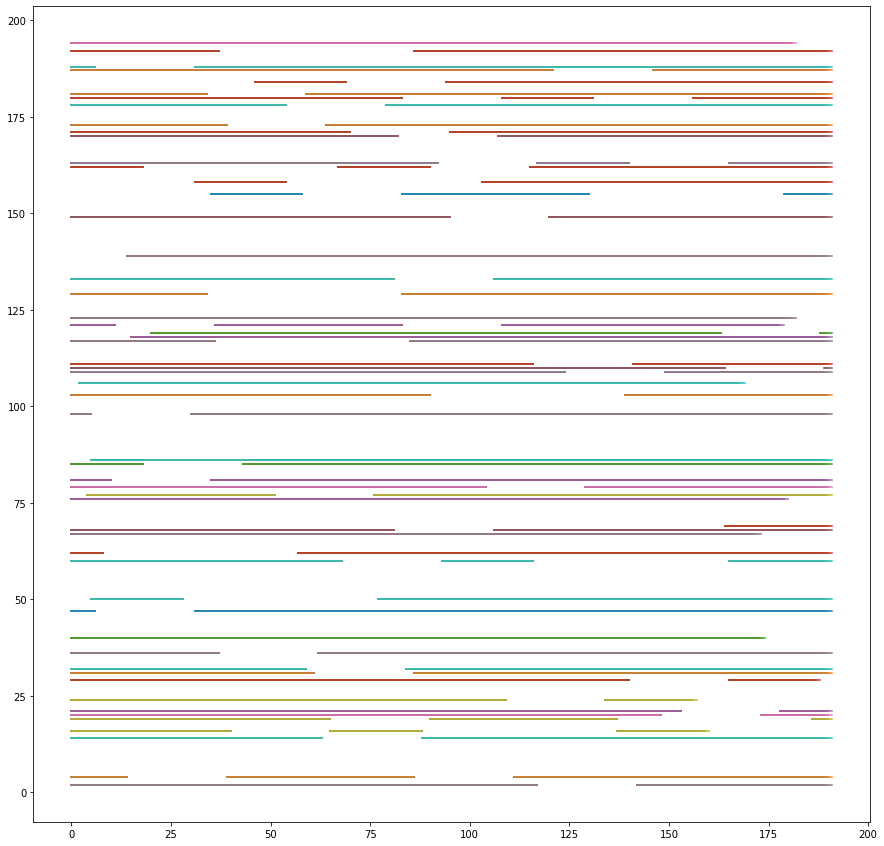

In [9]:
# plot discontiguous chunks
from numpy import nan
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot chunks that do not have all data
def plot_discontiguous_chunks(chunks, row_in_chunk_ix=2):
  fig,ax = pyplot.subplots(1, figsize = (15,15))
  n_steps = 8 * 24
  for c_id,rows in chunks.items():
    # skip chunks with all data
    if rows.shape[0] == n_steps:
      continue
    # create empty series
    series = [nan for _ in range(n_steps)]
    # mark all rows with data
    for row in rows:
      # convert to zero offset
      r_id = row[row_in_chunk_ix] - 1
      # mark value
      series[r_id] = c_id
      # plot
      ax.plot(series)
  plt.show()

# group data by chunks
values = df.values
chunks = to_chunks(values)
# plot discontiguous chunks
plot_discontiguous_chunks(chunks)

Existen varios fragmentos gráficados que tienen grandes cantidades de datos continuos, sin embargo hay otros fragmentos que tienen muy pocas observaciones. Debido a la discontinuidad de los datos, se procede a analizar cuales son las horas más comunes en que se realizan las mediciones.

###2.4- Exploración de la distribución de las horas de medición


Para comprobar como se distribuyen las horas de medición, se decide trabajar con los fragmentos de datos que tengan las 192 filas de observaciones (osea los 8 días), de tal manera que se selecciona solo la hora de la primera medición del fragmento. Posteriormente se realiza un gráfico de cajas y un histograma para visualizar la distribución.

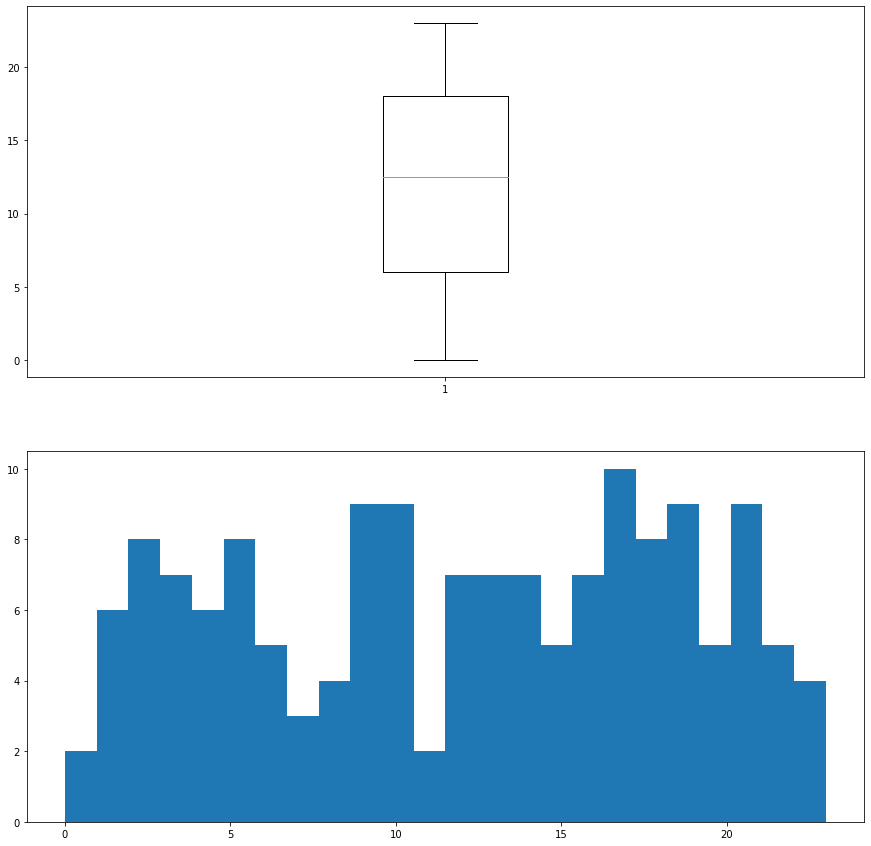

In [10]:
# plot distribution of chunk start hour
from numpy import nan
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot distribution of chunk start hour
def plot_chunk_start_hour(chunks, hour_in_chunk_ix=5):
  # chunk start hour
  chunk_start_hours = [v[0, hour_in_chunk_ix] for k,v in chunks.items() if len(v)==192]
  fig,ax = pyplot.subplots(2, figsize = (15,15))
  # boxplot
  ax[0].boxplot(chunk_start_hours)
  # histogram
  ax[1].hist(chunk_start_hours, bins=24)
  # histogram
  pyplot.show()

# group data by chunks
values = df.values
chunks = to_chunks(values)
# plot distribution of chunk start hour
plot_chunk_start_hour(chunks)

Pareciera no existir mayores diferncia en los horarios en que son tomadas las mediciones.

Aquí termina el análisis de la estructura general de los datos. A continuación se procede a analizar la estructura de las variables del conjunto de datos.

##3- Exploración de las variables de entrada


Existen 56 variables de entrada, donde las primeras 6 columnas de datos corresponden a variables relacionadas con el fragmento o con el tiempo de medición. Por su parte, de la columna 6 hasta la columna 55 corresponden a mediciones meterologicas para distintos puntos.

A continuación se listan las primeras 6 columnas de datos:

*   rowID
*   chunkID
*   position_within_chunk
*   month_most_common
*   weekday
*   hour

Ahora se listan las columnas correspondientes a mediciones meterologicas:

*   Solar.radiation_64
*   WindDirection..Resultant_1
*   WindDirection..Resultant_1018
*   WindSpeed..Resultant_1
*   WindSpeed..Resultant_1018
*   Ambient.Max.Temperature_14
*   Ambient.Max.Temperature_22
*   Ambient.Max.Temperature_50
*   Ambient.Max.Temperature_52
*   Ambient.Max.Temperature_57
*   Ambient.Max.Temperature_76
*   Ambient.Max.Temperature_2001
*   Ambient.Max.Temperature_3301
*   Ambient.Max.Temperature_6005
*   Ambient.Min.Temperature_14
*   Ambient.Min.Temperature_22
*   Ambient.Min.Temperature_50
*   Ambient.Min.Temperature_52
*   Ambient.Min.Temperature_57
*   Ambient.Min.Temperature_76
*   Ambient.Min.Temperature_2001
*   Ambient.Min.Temperature_3301
*   Ambient.Min.Temperature_6005
*   Sample.Baro.Pressure_14
*   Sample.Baro.Pressure_22
*   Sample.Baro.Pressure_50
*   Sample.Baro.Pressure_52
*   Sample.Baro.Pressure_57
*   Sample.Baro.Pressure_76
*   Sample.Baro.Pressure_2001
*   Sample.Baro.Pressure_3301
*   Sample.Baro.Pressure_6005
*   Sample.Max.Baro.Pressure_14
*   Sample.Max.Baro.Pressure_22
*   Sample.Max.Baro.Pressure_50
*   Sample.Max.Baro.Pressure_52
*   Sample.Max.Baro.Pressure_57
*   Sample.Max.Baro.Pressure_76
*   Sample.Max.Baro.Pressure_2001
*   Sample.Max.Baro.Pressure_3301
*   Sample.Max.Baro.Pressure_6005
*   Sample.Min.Baro.Pressure_14
*   Sample.Min.Baro.Pressure_22
*   Sample.Min.Baro.Pressure_50
*   Sample.Min.Baro.Pressure_52
*   Sample.Min.Baro.Pressure_57
*   Sample.Min.Baro.Pressure_76
*   Sample.Min.Baro.Pressure_2001
*   Sample.Min.Baro.Pressure_3301
*   Sample.Min.Baro.Pressure_6005


Sin embargo, si no consideramos la ubicación del sensor para las mediciones metereologicas, estas se pueden reducir a 8 variables:

*   Solar.radiation
*   WindDirection..Resultant
*   WindSpeed..Resultant
*   Ambient.Max.Temperature
*   Ambient.Min.Temperature
*   Sample.Baro.Pressure
*   Sample.Max.Baro.Pressure
*   Sample.Min.Baro.Pressure

Estas variables son medidas para 23 sitios del Condado de Cook. Los cuales son: 1, 14, 22, 50, 52, 57, 64, 76, 1018, 2001, 3301, 6005.



###3.1- Exploración de la estructura temporal de las variables de entrada

Para analizar la estructura temporal de las variables de entrada, se realiza un análisis visual para cada fragmento por separado. Esto se realiza generando una figura con 50 gráficas de linea, de tal manera que cada gráfica representa una variable de entrada. Cada figura representa la estructura temporal de las variables de entrada para un fragmento determinado.

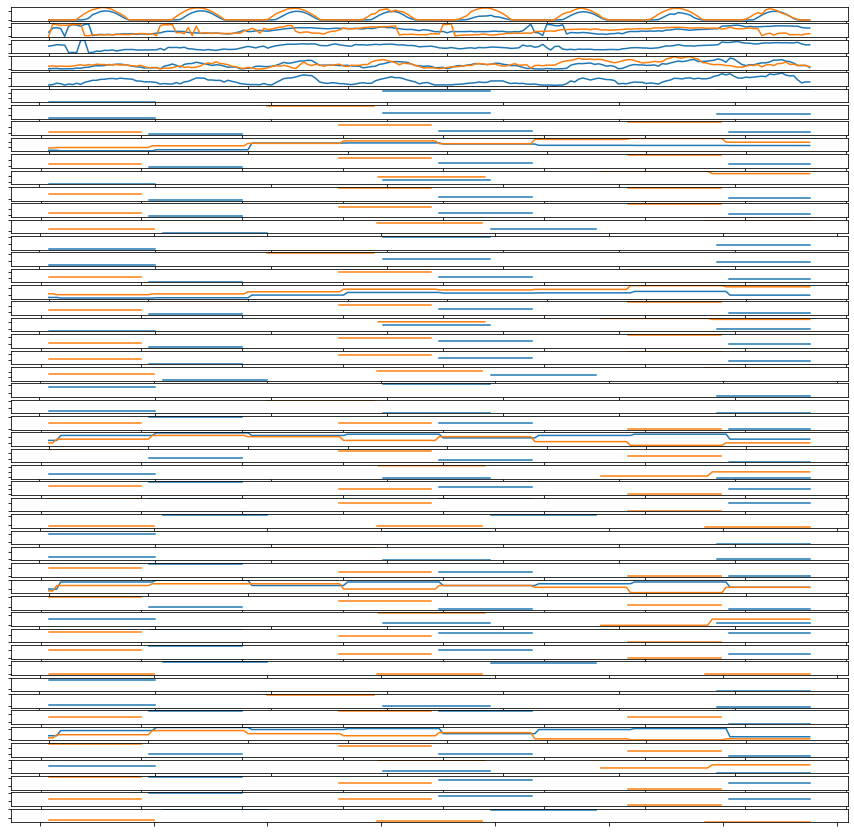

In [12]:
# plot inputs for a chunk
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot all inputs for one or more chunk ids
def plot_chunk_inputs(chunks, c_ids):
  #fig,ax = pyplot.subplots(2, figsize = (15,15))
	pyplot.figure(figsize = (15,15))
	inputs = range(6, 56)
	for i in range(len(inputs)):
		ax = pyplot.subplot(len(inputs), 1, i+1)
		ax.set_xticklabels([])
		ax.set_yticklabels([])
		column = inputs[i]
		for chunk_id in c_ids:
			rows = chunks[chunk_id]
			pyplot.plot(rows[:,column])
	pyplot.show()

# group data by chunks
values = df.values
chunks = to_chunks(values)
# plot inputs for some chunks
plot_chunk_inputs(chunks, [1,3])

Es necesario destacar que, con esta figura no se logra apreciar en detalle la estructura temporal de las variables de entrada, sin embargo es un acercamiento para un análisis posterior con una cantidad reducida de variables.

###3.2- Exploración de la distribución de las variables de entrada

Para analizar la distribución de las variables de entradas, se realiza un análisis visual para cada fragmento por separado. Esto se realiza generando una figura con 50 diagramas de caja, de tal manera que cada diagrama representa una variable de entrada. Cada figura representa la distribución de las variables de entrada para un fragmento determinado.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


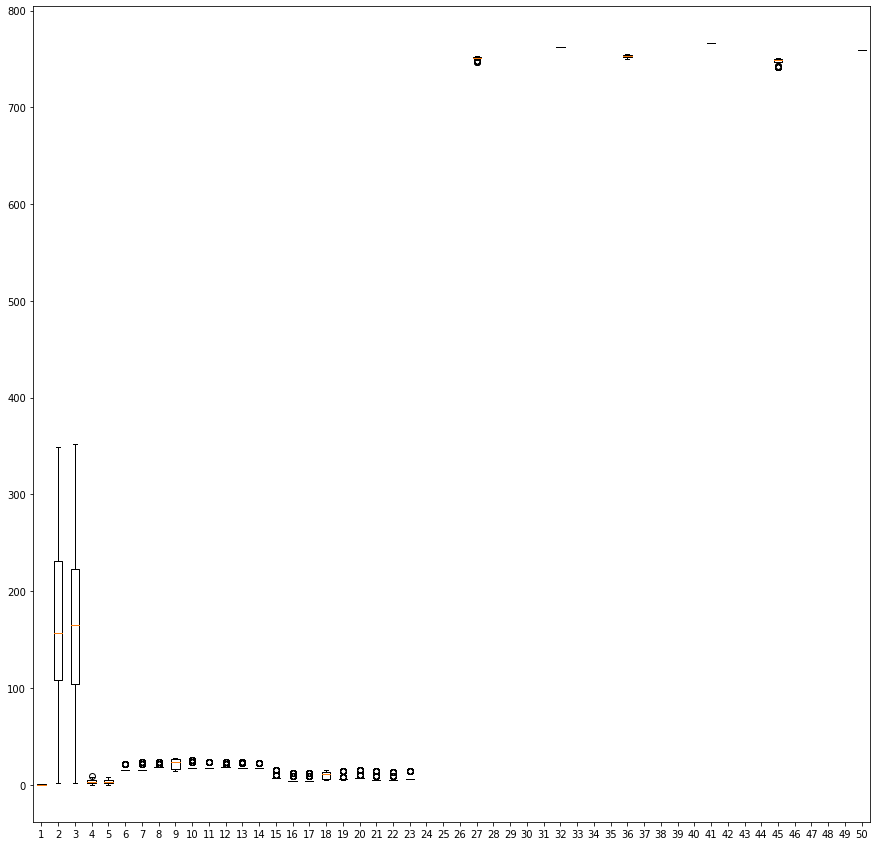

In [14]:
# boxplots of inputs for a chunk
from numpy import unique
from numpy import isnan
from numpy import count_nonzero
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# boxplot for input variables for a chuck
def plot_chunk_input_boxplots(chunks, c_id):
  pyplot.figure(figsize = (15,15))
  rows = chunks[c_id]
  pyplot.boxplot(rows[:,6:56])
  pyplot.show()

# group data by chunks
values = df.values
chunks = to_chunks(values)
# boxplot for input variables
plot_chunk_input_boxplots(chunks, 1)

Es necesario destacar que, con esta figura no se logra apreciar en detalle la distribución de las variables de entrada, sin embargo es un acercamiento para un análisis posterior con una cantidad reducida de variables.

###3.3- Exploración de la distribución de las variables de entrada con gráficos de histograma

Para analizar la distribución de las variables de entrada, se realiza un análisis visual para cada fragmento por separado. Esto se realiza generando una figura con 50 histogramas, de tal manera que cada histograma representa una variable de entrada. Cada figura representa la distribución de las variables de entrada para un fragmento determinado.

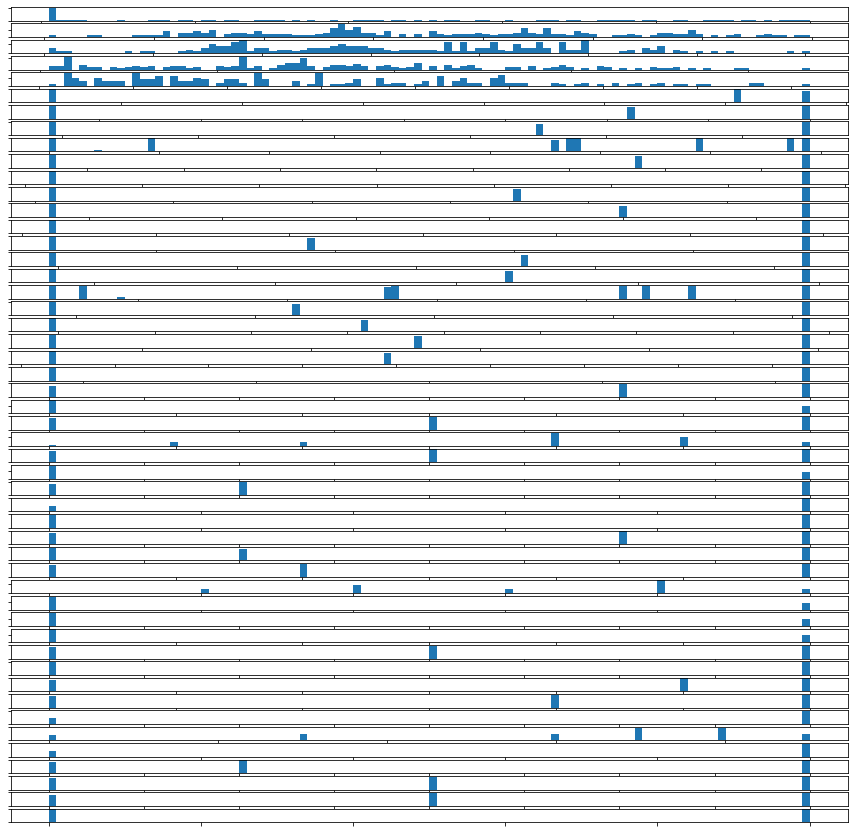

In [15]:
# plot distribution of targets for a chunk
from numpy import unique
from numpy import isnan
from numpy import count_nonzero
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot distribution of inputs for one or more chunk ids
def plot_chunk_inputs_hist(chunks, c_ids):
	pyplot.figure(figsize = (15,15))
	inputs = range(6, 56)
	for i in range(len(inputs)):
		ax = pyplot.subplot(len(inputs), 1, i+1)
		ax.set_xticklabels([])
		ax.set_yticklabels([])
		column = inputs[i]
		for chunk_id in c_ids:
			rows = chunks[chunk_id]
			# extract column of interest
			col = rows[:,column].astype('float32')
			# check for some data to plot
			if count_nonzero(isnan(col)) < len(rows):
				# only plot non-nan values
				pyplot.hist(col[~isnan(col)], bins=100)
	pyplot.show()

# group data by chunks
values = df.values
chunks = to_chunks(values)
# plot targets for some chunks
plot_chunk_inputs_hist(chunks, [1])

##4- Exploración de las variables objetivo


Existen 39 variables objetivo. Estas tienen el formato "target_(*número variable*)_(*número id*)", de tal manera que, "número variable" representa el tipo de varible medida y "número id" corresponde al id del sensor utilizado para realizar la medición. 

Cabe destacar que para la competencia se esconde el significado de la variable objetivo, y es por ello que se trabaja con "número variable" para diferenciar entre una medición y otra. No obstante, al finalizar la competencia fueron revelados los significados de cada número, los cuales se presenta a continuación:

**Description**:		Target Variable

**Carbon monoxide**:		8

**Sulfur dioxide**:		4

**SO2 max 5-min avg**3

**Nitric oxide (NO)**:		10

**Nitrogen dioxide (NO2)**:		14

**Oxides of nitrogen (NOx)**:		9

**Ozone**:		11

**PM10 Total 0-10um STP**:		5

**OC CSN Unadjusted PM2.5 LC TOT**:		15

**Total Nitrate PM2.5 LC**:		2

**EC CSN PM2.5 LC TOT**:		1

**Total Carbon PM2.5 LC TOT**:		7

**Sulfate PM2.5 LC**:		8

**PM2.5 Raw Data**:		4

**PM2.5 AQI & Speciation Mass**:		3



###4.1- Exploración de la estructura temporal de las variables objetivo

Para analizar la estructura temporal de las variables objetivo, se realiza un análisis visual para cada fragmento por separado. Esto se realiza generando una figura con 39 gráficas de linea, de tal manera que cada gráfica representa una variable objetivo. Cada figura representa la estructura temporal de las variables objetivo para un fragmento determinado.

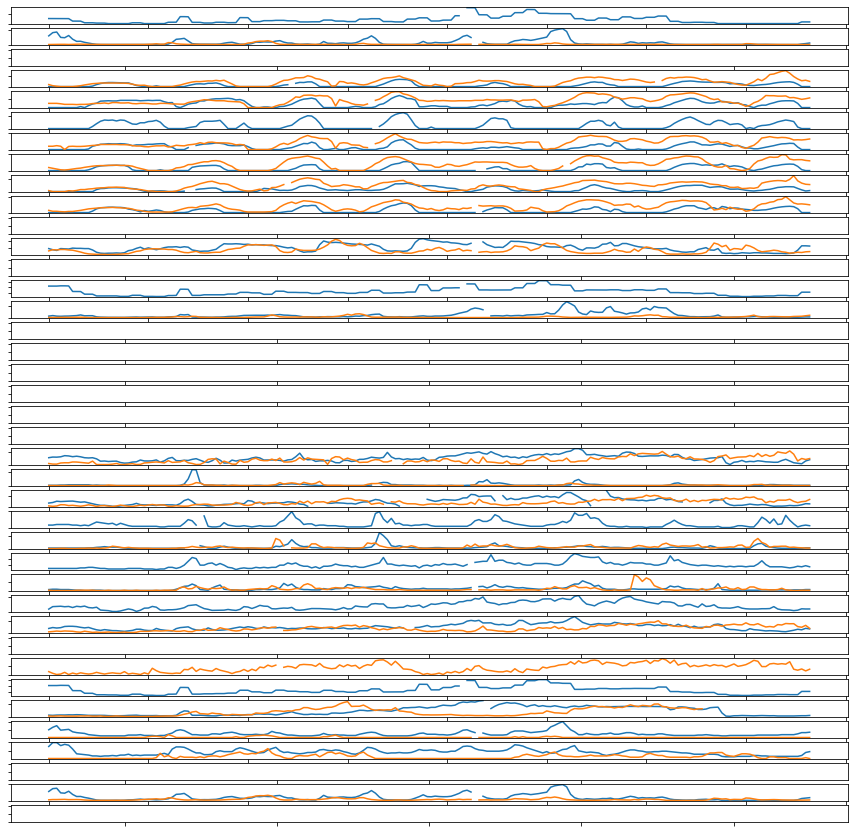

In [16]:
# plot targets for a chunk
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot all targets for one or more chunk ids
def plot_chunk_targets(chunks, c_ids):
	pyplot.figure(figsize = (15,15))
	targets = range(56, 95)
	for i in range(len(targets)):
		ax = pyplot.subplot(len(targets), 1, i+1)
		ax.set_xticklabels([])
		ax.set_yticklabels([])
		column = targets[i]
		for chunk_id in c_ids:
			rows = chunks[chunk_id]
			pyplot.plot(rows[:,column])
	pyplot.show()

# group data by chunks
values = df.values
chunks = to_chunks(values)
# plot targets for some chunks
plot_chunk_targets(chunks, [1,3])

Es necesario destacar que, con esta figura no se logra apreciar en detalle la estructura temporal de las variables objetivo, sin embargo es un acercamiento para un análisis posterior con una cantidad reducida de variables.

###4.2- Exploración de la distribución de las variables objetivo con diagrama de caja

Para analizar la distribución de las variables objetivo, se realiza un análisis visual para cada fragmento por separado. Esto se realiza generando una figura con 39 diagramas de caja, de tal manera que cada diagrama representa una variable objetivo. Cada figura representa la distribución de las variables objetivo para un fragmento determinado.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


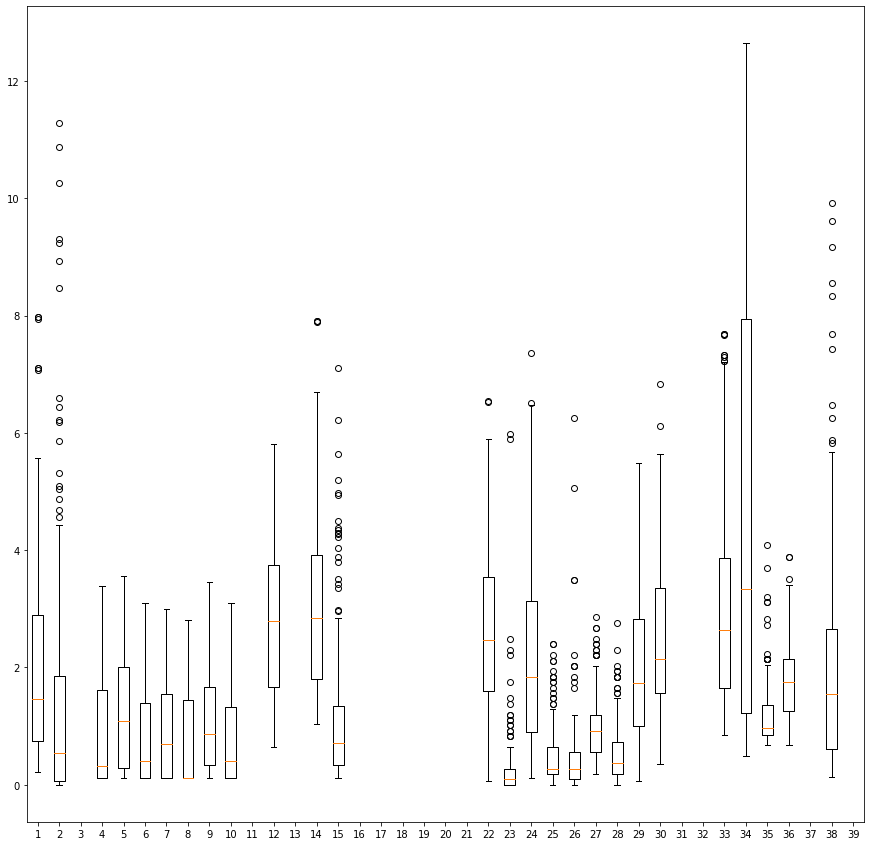

In [17]:
# boxplots of targets for a chunk
from numpy import unique
from numpy import isnan
from numpy import count_nonzero
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# boxplot for target variables for a chuck
def plot_chunk_targets_boxplots(chunks, c_id):
  pyplot.figure(figsize = (15,15))
  rows = chunks[c_id]
  pyplot.boxplot(rows[:,56:])
  pyplot.show()

# group data by chunks
values = df.values
chunks = to_chunks(values)
# boxplot for target variables
plot_chunk_targets_boxplots(chunks, 1)

Es necesario destacar que, con esta figura no se logra apreciar en detalle la distribución de las variables objetivo, sin embargo es un acercamiento para un análisis posterior con una cantidad reducida de variables.

###4.3- Exploración de la distribución de las variables objetivo con gráficos de histograma

Para analizar la distribución de las variables objetivo, se realiza un análisis visual para cada fragmento por separado. Esto se realiza generando una figura con 39 histogramas, de tal manera que cada histograma representa una variable objetivo. Cada figura representa la distribución de las variables objetivo para un fragmento determinado.

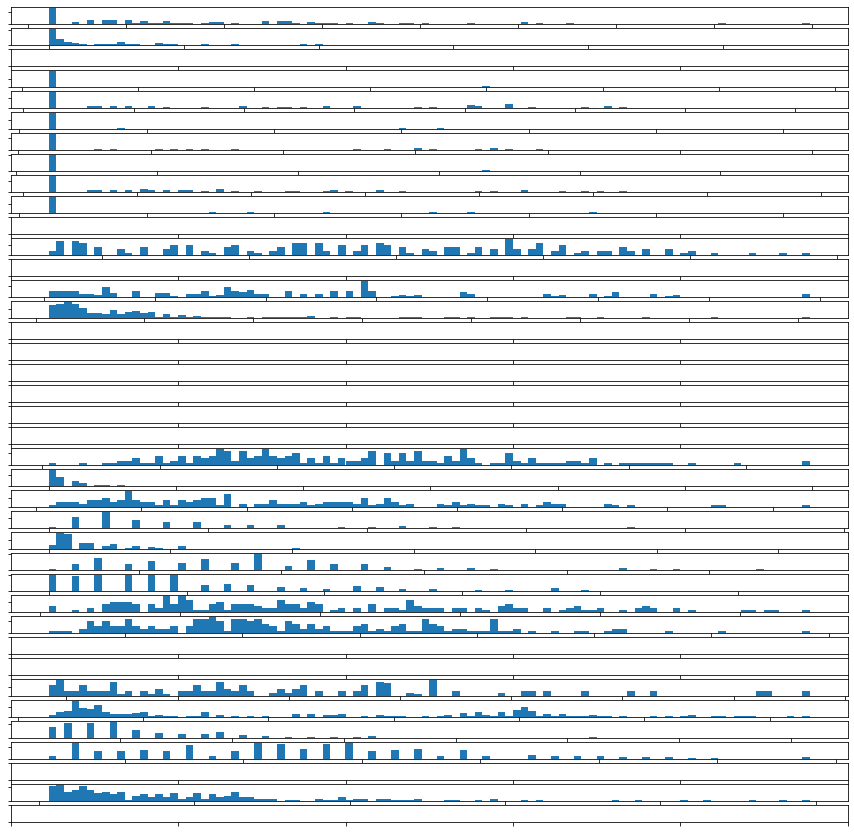

In [18]:
# plot distribution of targets for a chunk
from numpy import unique
from numpy import isnan
from numpy import count_nonzero
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot distribution of targets for one or more chunk ids
def plot_chunk_targets_hist(chunks, c_ids):
	pyplot.figure(figsize = (15,15))
	targets = range(56, 95)
	for i in range(len(targets)):
		ax = pyplot.subplot(len(targets), 1, i+1)
		ax.set_xticklabels([])
		ax.set_yticklabels([])
		column = targets[i]
		for chunk_id in c_ids:
			rows = chunks[chunk_id]
			# extract column of interest
			col = rows[:,column].astype('float32')
			# check for some data to plot
			if count_nonzero(isnan(col)) < len(rows):
				# only plot non-nan values
				pyplot.hist(col[~isnan(col)], bins=100)
	pyplot.show()

# group data by chunks
values = df.values
chunks = to_chunks(values)
# plot targets for some chunks
plot_chunk_targets_hist(chunks, [1])

##5- Conclusiones sobre los datos

Al gráficar las distribuciones de las variables de entrada y de las variables objetivo para el fragmento con id = 1, es posible notar que algunas variables no presentan datos. Es por eso que se procede a analizar la cantidad de datos faltantes para cada columna.

Por otra parte, debido a que se realizan mediciones por sensor, parece interesante intentar visualizar la distribución geografica de los mismos.

###5.1- Visualización del porcentaje de datos faltantes por columna

Ahora se analiza el porcentaje de datos faltantes en cada una de las columnas. Para esto se exceptuan las variables relacionadas con la identificación del fragmento o con el tiempo de medición, especificamente se dejan fuera las primeras 5 columnas. 

Para esto se calcula el porcentaje de datos perdidos por columna y luego se agrega una columna  en un gráfico de barra para cada valor obtenido.

Variable columna: 11: 91.48885539779488 N°1
Variable columna: 12: 80.89950027762353 N°2
Variable columna: 20: 91.48885539779488 N°3
Variable columna: 21: 80.77258665820575 N°4
Variable columna: 29: 91.48885539779488 N°5
Variable columna: 30: 80.94709288490522 N°6
Variable columna: 38: 91.48885539779488 N°7
Variable columna: 39: 81.02641389704132 N°8
Variable columna: 47: 91.48885539779488 N°9
Variable columna: 48: 81.59223711694561 N°10
Variable columna: 56: 84.9448718965654 N°11
Variable columna: 58: 95.38880516115385 N°12
Variable columna: 61: 85.32296872108088 N°13
Variable columna: 66: 96.9805134713519 N°14
Variable columna: 68: 95.38880516115385 N°15
Variable columna: 69: 84.9448718965654 N°16
Variable columna: 72: 97.31630575606145 N°17
Variable columna: 74: 86.98342190846355 N°18
Variable columna: 75: 88.07805187594194 N°19
Variable columna: 82: 85.4287300705957 N°20
Variable columna: 84: 76.46281166547685 N°21
Variable columna: 86: 95.38880516115385 N°22
Variable columna: 87: 8

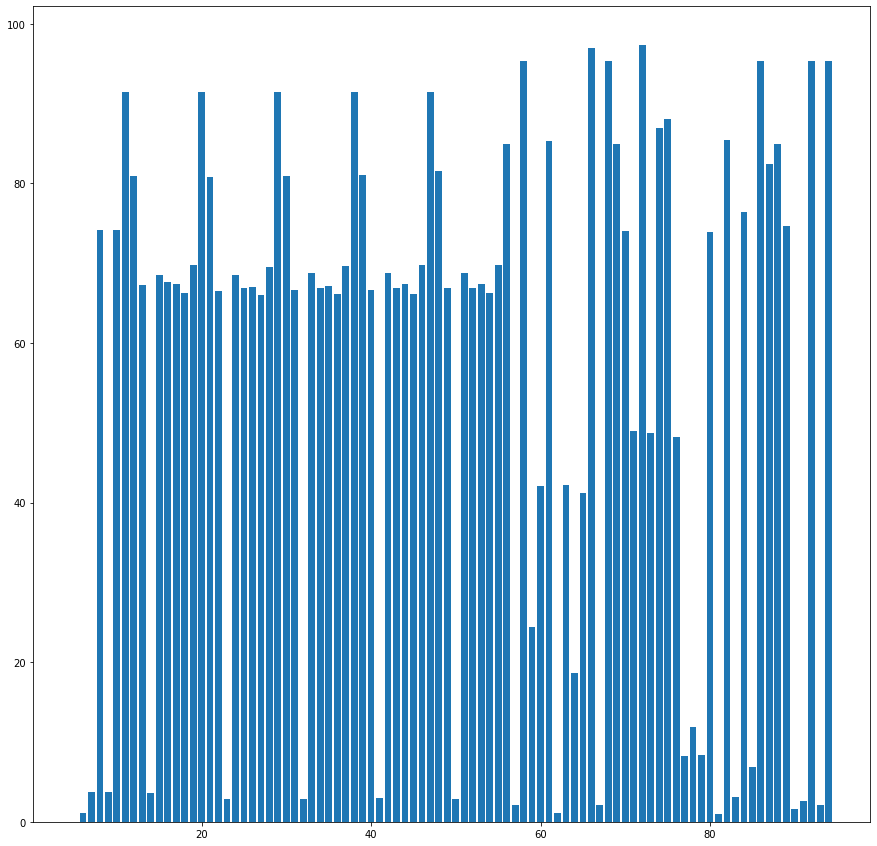

In [19]:
# summarize missing data per column
from numpy import isnan
from numpy import count_nonzero
from pandas import read_csv
from matplotlib import pyplot

# bar chart of the ratio of missing data per column
def plot_col_percentage_missing(values, ix_start=5):
  contador = 1
  ratios = list()
  pyplot.figure(figsize = (15,15))
  # skip early columns, with meta data or strings
  for col in range(ix_start, values.shape[1]):
    col_data = values[:, col].astype('float32')
    ratio = count_nonzero(isnan(col_data)) / len(col_data) * 100
    ratios.append(ratio)
    aux = "Variable columna: " + str(col) + ": " + str(ratio) + " N°"+str(contador)
    if ratio > 75.0:
      print(aux)
      contador = contador + 1
  col_id = [x for x in range(ix_start, values.shape[1])]
  pyplot.bar(col_id, ratios)
  pyplot.show()

# plot ratio of missing data per column
values = df.values
plot_col_percentage_missing(values)

###5.2- Visualización geográfica de los sensores

A continuación se procede a visualizar geograficamente los sensores. Cabe destacar que este proceso es guiado por el siguiente tutorial:

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972


In [ ]:
ls

Cook/          SiteLocations.csv                  SubmissionZerosExceptNAs.csv
sample_code.r  SiteLocations_with_more_sites.csv  TrainingData.csv


In [ ]:
cd Cook/

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/Data_AQP/Cook


In [ ]:
ls

tl_2017_17031_roads.cpg  tl_2017_17031_roads.shp.ea.iso.xml
tl_2017_17031_roads.dbf  tl_2017_17031_roads.shp.iso.xml
tl_2017_17031_roads.prj  tl_2017_17031_roads.shp.xml
tl_2017_17031_roads.shp  tl_2017_17031_roads.shx


In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 9.1MB/s 
     |████████████████████████████████| 14.8MB 326kB/s 
     |████████████████████████████████| 6.5MB 25.5MB/s 


In [ ]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

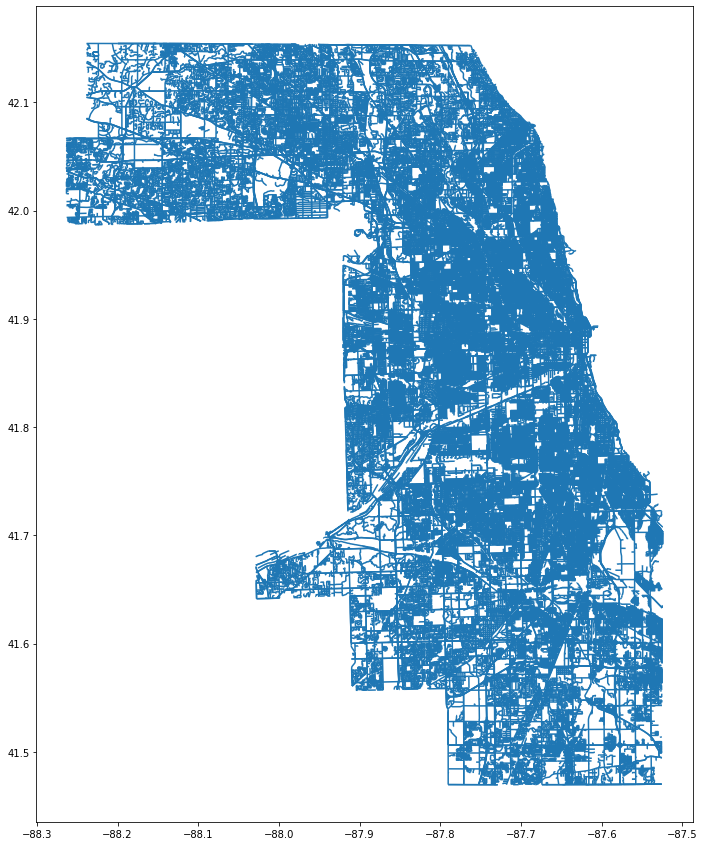

In [ ]:
stret_map = gpd.read_file('tl_2017_17031_roads.shp')
fig,ax = plt.subplots(figsize = (15,15))
stret_map.plot(ax = ax)

In [ ]:
pwd

'/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/Data_AQP/Cook'

In [ ]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/Data_AQP


In [ ]:
ls

Cook/          SiteLocations.csv                  SubmissionZerosExceptNAs.csv
sample_code.r  SiteLocations_with_more_sites.csv  TrainingData.csv


In [ ]:
sensors = pd.read_csv('SiteLocations_with_more_sites.csv')
crs = {'init': 'epsg:4326'}
sensors.head()

SITE_ID   LATITUDE  LONGITUDE
0        1  41.670992 -87.732457
1       14  41.834243 -87.623800
2       22  41.687165 -87.539315
3       32  41.755832 -87.545350
4       50  41.707570 -87.568574

In [ ]:
geometry = [Point(xy) for xy in zip(sensors["LONGITUDE"], sensors["LATITUDE"])]
geometry[:3]

In [ ]:
geo_df = gpd.GeoDataFrame(sensors, crs = crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


SITE_ID   LATITUDE  LONGITUDE                    geometry
0        1  41.670992 -87.732457  POINT (-87.73246 41.67099)
1       14  41.834243 -87.623800  POINT (-87.62380 41.83424)
2       22  41.687165 -87.539315  POINT (-87.53932 41.68717)
3       32  41.755832 -87.545350  POINT (-87.54535 41.75583)
4       50  41.707570 -87.568574  POINT (-87.56857 41.70757)

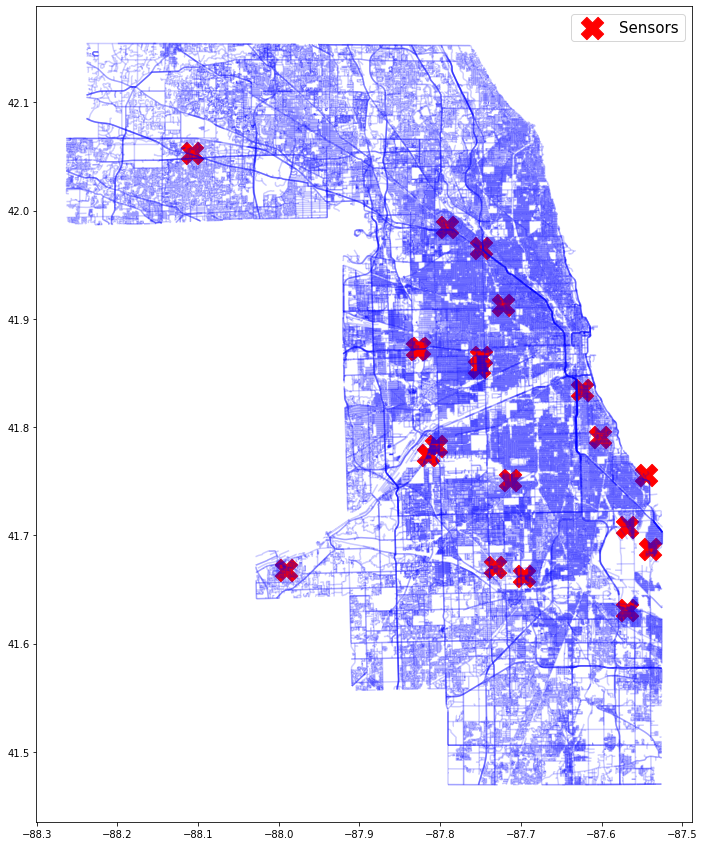

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
stret_map.plot(ax = ax, alpha = 0.2, color="blue")
geo_df.plot(ax = ax, markersize = 500, color = "red", marker = "X", label = "Sensors")
plt.legend(prop={'size':15})

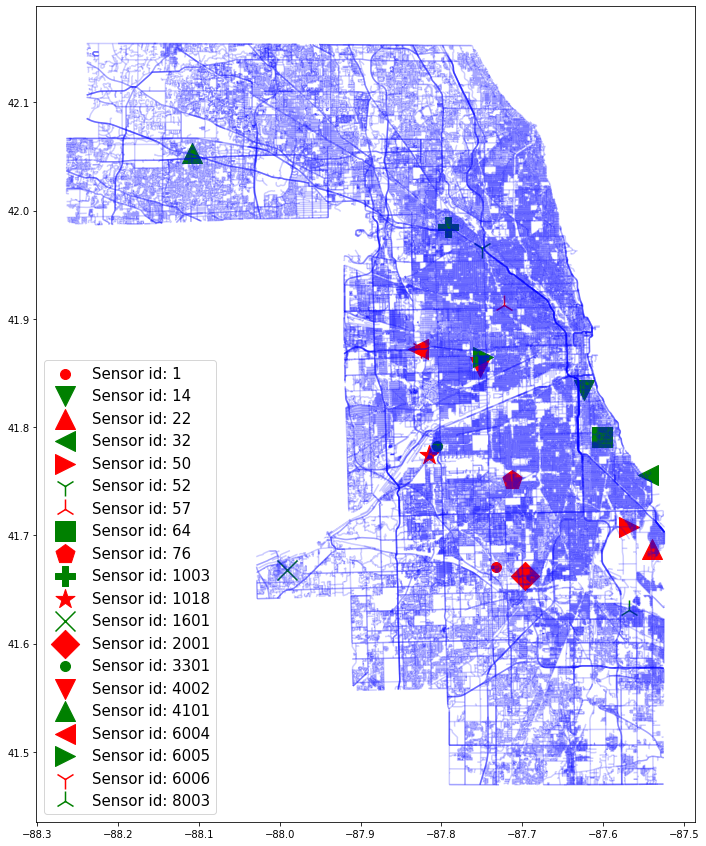

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
stret_map.plot(ax = ax, alpha = 0.2, color="blue")
markers = [".", "v", "^", "<", ">", "1", "2", "s", "p", "P", "*", "x", "D", ".", "v", "^", "<", ">", "1", "2"]
colors = ["red", "green"]

indiceColor = 0

for i in range(len(sensors)):
  label = "Sensor id: " + str(geo_df.iloc[i,0])
  geo_df.iloc[[i]].plot(ax = ax, markersize = 400, color = colors[indiceColor], marker = markers[i], label = label)
  if indiceColor == 1:
    indiceColor = 0
  else:
    indiceColor = 1
plt.legend(prop={'size':15})

A continuación se presentan algunas cosas a destacar sobre los datos:

*   No todas las variables se registran en todos los puntos de medición.
*   Existe cierta cercania entre algunos sensores, como por ejemplo con el sensor 1.
*   Hay sensores que se utilizan en las variables objetivo pero que no se utilizan en las variables de entrada, como por ejemplo el sensor 4002.
*   Hay sensores que se utilizan en las variables de entrada pero que no se utilizan en las variables objetivo, como por ejemplo el sensor 14.

Por lo tanto, es muy probable que no todas las variables se registran en todas las ubicaciones.


###5.3- Decisiones y pasos a seguir

Es necesario destacar que el método EDA debe ser ejecutado de manera iterativa, ya que se deben volver a repetir los pasos del EDA hasta que se obtenga el resultado esperado. Por otra parte, el objetivo principal de esta tesis es realizar un estudio comparativo, por lo que es necesario limitar los alcances reales de este problema de predicción. 

En la competencia se solicitaba realizar predicciones con multiples variables de entrada, multiples salidas y multiples pasos de tiempos para predecir a futuro. Para acotar esto se decide trabajar con multiples variables de entrada, pero solo con una salida y un paso de tiempo a futuro.

Explicado lo anterior, se espera con este ultimo paso dar termino a la primera iteración del presente EDA, con el objetivo de reducir el conjunto de datos y empezar una segunda iteración con un conjunto de datos acotado.

A continuación se listan las decisiones que permiten reducir el conjunto de datos:

1.   Se deciden eliminar las columnas con más del 75% de los datos perdidos. 
2.   Se decide trabajar con solo una variables objetivo, de tal manera que se selecciona la que contenga menor porcentaje de datos perdidos.
3. Se deciden eliminar los fragmentos con menos de 100 filas.



####5.3.1- Eliminar columnas y filas 

A continuación se realiza el proceso de eliminación de columnas. Este proceso se divide en dos pasos, primero se calcula

In [20]:
# summarize missing data per column
from numpy import isnan
from numpy import count_nonzero

# calculate the ratio of missing data per column
def calculate_col_percentage_missing(values, ix_start=6):
  listaSummary = []
  # skip early columns, with meta data or strings
  for col in range(ix_start, values.shape[1]):
    col_data = values[:, col].astype('float32')
    ratio = count_nonzero(isnan(col_data)) / len(col_data) * 100
    listaSummary.append({'p':ratio,'i':col})
  return listaSummary


# calculate rows per chunk
def calculate_rows(chunks):
  # chunk durations in hours
  chunk_durations = [{'k':k,'l':len(v)} for k,v in chunks.items()]
  return chunk_durations



# calculate ratio of missing data per column
values = df.values
listaR = calculate_col_percentage_missing(values)

#Se ordenan los diccioarios de manera ascendente y descendente
listaSort1 = sorted(listaR,key=lambda obj: obj['p'])
listaSort2 = sorted(listaR,key=lambda obj: obj['p'],reverse=True)
#De esto se observa que la columna con menos perdida de informacion es la 81, la cual corresponde a un target porque el indice es mayor a 56
print(listaR)
print(listaSort1)
print(listaSort2)

#Se generan los diccionarios con columnas a eliminar o mantener
#el filtro usado es que el porcentaje de datos perdidos este por sobre o bajo el umbral de 75
columnsToEliminate = [d for d in listaR if d['p'] >75]
columnsToSave = [d for d in listaR if d['p'] <75]

#se generan el vector con columnas a mantener
columnsToSaveVector = [d['i'] for d in listaR if d['p'] <75]

#se generan el vector con columnas a mantener y sin las columnas target
columnsToSaveVectorWithoutTargets = [d['i'] for d in listaR if d['p'] <75 and  d['i'] < 56]

#Se genera un vector con las columnas iniciales
vector1 = [0,1,2,3,4,5]
#se genera un vector con las columnas a guardar y con las columnas iniciales
columnsToSaveVector = np.concatenate((vector1, columnsToSaveVector))
#Se genera el dataframe con las columnas que tienen menos del 75% de los datos perdidos
newDF1 = df.iloc[:,columnsToSaveVector]

vector2 = [81]
#Se genera un vector con las columnas a guardar sin los target
columnsToSaveVectorWithoutTargets = np.concatenate((vector1, columnsToSaveVectorWithoutTargets))
#se genera un vector con las columnas a guardar y el target de la columnas 81 (es el que tiene mayor informacion)
columnsToSaveVectorWithoutTargets = np.concatenate((columnsToSaveVectorWithoutTargets, vector2))
#Se genera un dataframe con las columnas que tienen mas del 75 porciento de los datos y solo con el target de la columna 81
newDF2 = df.iloc[:,columnsToSaveVectorWithoutTargets]






print(columnsToEliminate)
print(columnsToSave)
print(columnsToSaveVector)
print(df)


#se genera una un diccionario con el chunkid y la cantidad de filas para ese fragmento
listAmountRows = calculate_rows(chunks)
#se generan un vector con los chunkid que tienen menos de 100 filas
chunksIdsForDelete = [d['k'] for d in listAmountRows if d['l'] <100]

print(listAmountRows)
print(chunksIdsForDelete)

#Se crea un nuevo dataframe sin las columnas que tienen menos de 100 filas
newDF3 = newDF2.loc[newDF2['chunkID'] != chunksIdsForDelete[0]]
for i in range(1, len(chunksIdsForDelete)):
  newDF3 = newDF3.loc[newDF3['chunkID'] != chunksIdsForDelete[i]]


print(newDF1)
print(newDF2)
print(newDF3)


[{'p': 1.126358372332831, 'i': 6}, {'p': 3.780968245154808, 'i': 7}, {'p': 74.20480685333544, 'i': 8}, {'p': 3.780968245154808, 'i': 9}, {'p': 74.20480685333544, 'i': 10}, {'p': 91.48885539779488, 'i': 11}, {'p': 80.89950027762353, 'i': 12}, {'p': 67.29859073001772, 'i': 13}, {'p': 3.598529917241744, 'i': 14}, {'p': 68.46725364215648, 'i': 15}, {'p': 67.6132307448243, 'i': 16}, {'p': 67.39641997831892, 'i': 17}, {'p': 66.31501017952989, 'i': 18}, {'p': 69.78662647735385, 'i': 19}, {'p': 91.48885539779488, 'i': 20}, {'p': 80.77258665820575, 'i': 21}, {'p': 66.5556172496761, 'i': 22}, {'p': 2.8502683694243935, 'i': 23}, {'p': 68.46725364215648, 'i': 24}, {'p': 66.94429020914306, 'i': 25}, {'p': 67.07913592977447, 'i': 26}, {'p': 66.06118294069432, 'i': 27}, {'p': 69.49313873245022, 'i': 28}, {'p': 91.48885539779488, 'i': 29}, {'p': 80.94709288490522, 'i': 30}, {'p': 66.60849792443352, 'i': 31}, {'p': 2.8502683694243935, 'i': 32}, {'p': 68.7607413870601, 'i': 33}, {'p': 66.88083339943418,

####5.3.3- Resumen resultados y termino primera iteración

A continuación se lista resumidamente los cambios realizados a la base de datos:

1.   Se pasan de 39 variables objetivo a 1. Los ganadores de la competencia realizaron un modelo para cada una de las variables objetivo, por lo que se justifica la decisión de realizar un predictor para una variable ojetivo. Se decide trabajar con esta variable porque corresponde a la que tiene menos perdida de información.
2.   Se pasa de 56 varibles de entrada a 40, esto se realiza eliminando las variables que tienen mayor del 75% de los datos perdidos.
3.   Se eliminan las filas correspondientes a 3 fragmentos que contenian en total menos de 100 filas por fragmento. 

Ahora se procede a escribir la data filtrada y se da termino a la primera iteración del EDA.



In [21]:
newDF3.to_csv('filterData1.csv', index = False)